In [49]:
import pandas as pd 
import os
import json

ARR_REVIEWS_PATH = '/fsx/homes/Abdelrahman.Sadallah@mbzuai.ac.ae/huggingface/hub/datasets--GitBag--Reviewer2_PGE_raw/ARR/ARR_2022/ARR_2022_review'

acl_reviews = []
for filename in os.listdir(ARR_REVIEWS_PATH):
    f = os.path.join(ARR_REVIEWS_PATH, filename)
    # checking if it is a filecd AC 
    if os.path.isfile(f):
        acl_reviews.append([filename,json.load(open(f))])

In [50]:
acl_reviews[0]
all_reviews = []


for review in acl_reviews:
    for r in review[1]:
        r['paped_id'] = review[0].split('.')[0]
        for k in r['report'].keys():
            r[k] = r['report'][k]
        for k in r['scores'].keys():
            r['score_'+k] = r['scores'][k]
        for k in r['meta'].keys():
            r[k] = r['meta'][k]

        all_reviews.append(r)

In [51]:
len(all_reviews)

684

In [52]:
all_reviews_df = pd.DataFrame(all_reviews)

In [53]:
all_reviews_df.columns

Index(['rid', 'reviewer', 'report', 'scores', 'meta', 'paped_id',
       'paper_summary', 'summary_of_strengths', 'summary_of_weaknesses',
       'comments,_suggestions_and_typos', 'score_overall', 'score_best_paper',
       'score_datasets', 'score_software', 'license', 'author_identity_guess',
       'confidence', 'sentences', 'score_replicability', 'ethical_concerns'],
      dtype='object')

In [54]:
all_reviews_df = all_reviews_df.drop(columns=['rid','reviewer','report','meta','license','sentences','scores'])
all_reviews_df = all_reviews_df.dropna(subset=['summary_of_weaknesses'])
all_reviews_df

,paped_id,paper_summary,summary_of_strengths,summary_of_weaknesses,"comments,_suggestions_and_typos",score_overall,score_best_paper,score_datasets,score_software,author_identity_guess,confidence,score_replicability,ethical_concerns
0,ARR_2022_20_review,This paper aims to find the best strategy to s...,Comprehensive empirical studies. Experiments s...,Although the experiments are very comprehensiv...,Can you provide more insights about why loss e...,3 = Good: This paper makes a reasonable contri...,No,1 = No usable datasets submitted.,3 = Potentially useful: Someone might find the...,1 = I do not have even an educated guess about...,"2 = Willing to defend my evaluation, but it i...",NaN,NaN
1,ARR_2022_99_review,This paper investigates whether self-attention...,- The paper is well written and easy to follow...,- The paper is not so clear as the introductio...,Comments: 1. If a model correlates better wi...,3.5,No,1 = No usable datasets submitted.,3 = Potentially useful: Someone might find the...,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,"4 = They could mostly reproduce the results, b...",NaN
2,ARR_2022_99_review,This paper compared the self-attention functio...,This paper focused on investigating the relati...,"I like this paper overall, but there are sever...",see above,3.5,No,1 = No usable datasets submitted.,1 = No usable software released.,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,3 = They could reproduce the results with some...,NaN
3,ARR_2022_241_review,This work evaluates 4 different ASR models und...,- The scenario investigated is indeed very use...,- the main contribution of fine-tuning a multi...,- One point I would like to read more about is...,"2 = Borderline: This paper has some merit, but...",No,4 = Useful: I would recommend the new datasets...,4 = Useful: I would recommend the new software...,3 = From the contents of the submission itself...,"3 = Pretty sure, but there's a chance I misse...",5 = They could easily reproduce the results.,NaN
4,ARR_2022_241_review,This paper is about the design of an automatic...,The strength of this paper is that it uses a u...,"The motivation, purpose, and selection of mode...",Even if I take into account the convenience of...,"2 = Borderline: This paper has some merit, but...",No,5 = Enabling: The newly released datasets shou...,5 = Enabling: The newly released software shou...,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,"4 = They could mostly reproduce the results, b...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,ARR_2022_230_review,A comprehensive set of experiments are conduct...,- A comprehensive comparison of models on text...,- Limited to multi-class topical text categori...,- Can parameter counts/training time for graph...,4 = Strong: This paper is of significant inter...,No,1 = No usable datasets submitted.,4 = Useful: I would recommend the new software...,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,"4 = They could mostly reproduce the results, b...",NaN
680,ARR_2022_125_review,In biaffine graph-based architecture for seman...,- The motivation of adding the auxiliary tasks...,- It seems that how to choose the set of auxil...,Please see summary of weaknesses.,3 = Good: This paper is of interest to the *AC...,No,1 = No usable datasets submitted.,1 = No usable software released.,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,5 = They could easily reproduce the results.,NaN
681,ARR_2022_125_review,This paper proposed the use of a set of auxili...,"For a short paper, this paper is well organize...",1. A more explicit definition / description / ...,Content: 1. Line 027: what did you mean by “pl...,3 = Good: This paper is of interest to the *AC...,No,1 = No usable datasets submitted.

In [55]:
for index, row in all_reviews_df.iterrows():
    s = ''
    if len(row['summary_of_weaknesses'].split()) > 9 :
        s = row['summary_of_weaknesses']

    if len(row['comments,_suggestions_and_typos'].split()) > 9 :
        s += '\n' + row['comments,_suggestions_and_typos']
        all_reviews_df.at[index,'focused_review'] = s

In [56]:
all_reviews_df.dropna(subset=['focused_review'],inplace=True)


In [57]:
cnt = 0
for r in all_reviews_df['focused_review']:
    if len(str(r).split())  < 10:
        cnt += 1
        print(r)

cnt

0

In [58]:
all_reviews_df = all_reviews_df.reset_index(drop=True)
all_reviews_df

,paped_id,paper_summary,summary_of_strengths,summary_of_weaknesses,"comments,_suggestions_and_typos",score_overall,score_best_paper,score_datasets,score_software,author_identity_guess,confidence,score_replicability,ethical_concerns,focused_review
0,ARR_2022_20_review,This paper aims to find the best strategy to s...,Comprehensive empirical studies. Experiments s...,Although the experiments are very comprehensiv...,Can you provide more insights about why loss e...,3 = Good: This paper makes a reasonable contri...,No,1 = No usable datasets submitted.,3 = Potentially useful: Someone might find the...,1 = I do not have even an educated guess about...,"2 = Willing to defend my evaluation, but it i...",NaN,NaN,Although the experiments are very comprehensiv...
1,ARR_2022_99_review,This paper investigates whether self-attention...,- The paper is well written and easy to follow...,- The paper is not so clear as the introductio...,Comments: 1. If a model correlates better wi...,3.5,No,1 = No usable datasets submitted.,3 = Potentially useful: Someone might find the...,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,"4 = They could mostly reproduce the results, b...",NaN,- The paper is not so clear as the introductio...
2,ARR_2022_241_review,This work evaluates 4 different ASR models und...,- The scenario investigated is indeed very use...,- the main contribution of fine-tuning a multi...,- One point I would like to read more about is...,"2 = Borderline: This paper has some merit, but...",No,4 = Useful: I would recommend the new datasets...,4 = Useful: I would recommend the new software...,3 = From the contents of the submission itself...,"3 = Pretty sure, but there's a chance I misse...",5 = They could easily reproduce the results.,NaN,- the main contribution of fine-tuning a multi...
3,ARR_2022_241_review,This paper is about the design of an automatic...,The strength of this paper is that it uses a u...,"The motivation, purpose, and selection of mode...",Even if I take into account the convenience of...,"2 = Borderline: This paper has some merit, but...",No,5 = Enabling: The newly released datasets shou...,5 = Enabling: The newly released software shou...,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,"4 = They could mostly reproduce the results, b...",NaN,"The motivation, purpose, and selection of mode..."
4,ARR_2022_241_review,This paper discusses an important task for end...,The paper addresses a very real and challengin...,I feel the choice of models used by the author...,1) Could you provide the source of the g2p rul...,3.5,No,1 = No usable datasets submitted.,3 = Potentially useful: Someone might find the...,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,"4 = They could mostly reproduce the results, b...",NaN,I feel the choice of models used by the author...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,ARR_2022_51_review,This paper proposes improving many-to-many NMT...,"The experiment covers many different setups, w...",1. The choice of the word-alignment baseline ...,1. Please provide more details for the sentenc...,2.5,No,1 = No usable datasets submitted.,1 = No usable software released.,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,NaN,NaN,1. The choice of the word-alignment baseline ...
569,ARR_2022_230_review,A comprehensive set of experiments are conduct...,- A comprehensive comparison of models on text...,- Limited to multi-class topical text categori...,- Can parameter counts/training time for graph...,4 = Strong: This paper is of significant inter...,No,1 = No usable datasets submitted.,4 = Useful: I would recommend the new software...,1 = I do not have even an educated guess about...,4 = Quite sure. I tried to check the important...,"4 = They could mostly reproduce the results, b...",NaN,- Lim

In [59]:
all_reviews_df.head()

all_reviews_df.to_csv('../../data/reviewer2_ARR_2022_reviews.csv',index=False)

In [66]:

import pandas as pd

df = pd.read_csv('../../data/reviewer2_ARR_2022_reviews_gemma2.csv')


In [72]:
cnt = 0
for r in df['focused_review']:
    if len(str(r).split())  < 10:
        cnt += 1
        print(r)

cnt

0

<Axes: xlabel='Constructiveness or Politeness'>

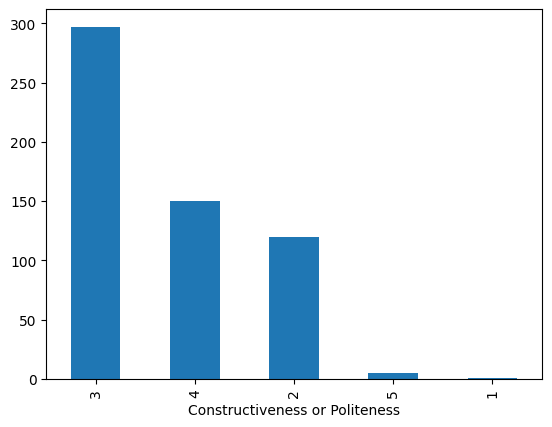

In [75]:
df['Constructiveness or Politeness'].value_counts().plot(kind='bar')

<Axes: xlabel='Actionability'>

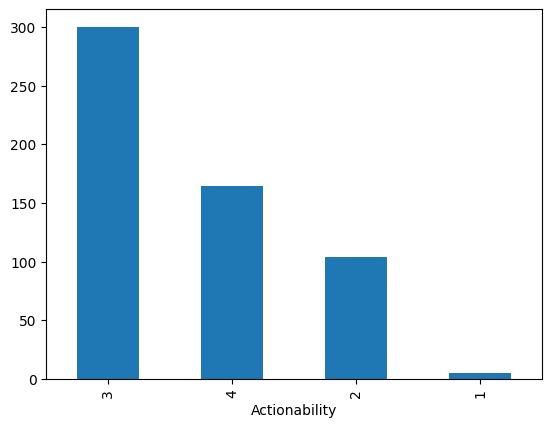

In [76]:
df['Actionability'].value_counts().plot(kind='bar')


<Axes: xlabel='Specificity'>

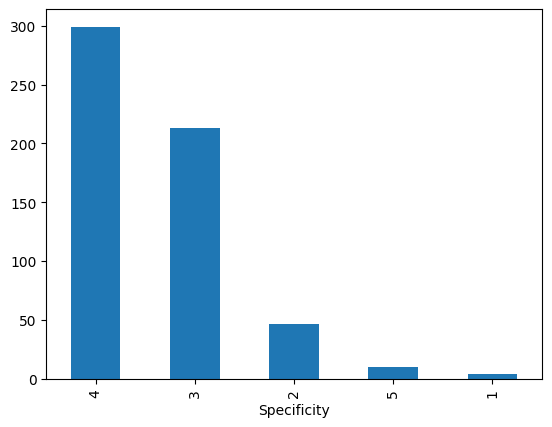

In [77]:
df['Specificity'].value_counts().plot(kind='bar')


<Axes: xlabel='Credibility or Verifiability'>

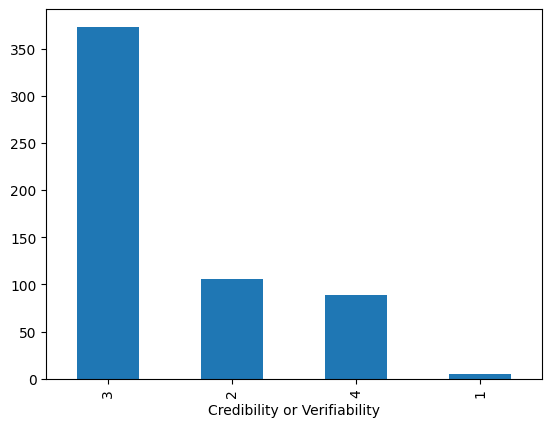

In [78]:
df['Credibility or Verifiability'].value_counts().plot(kind='bar')
